#### - Sobhan Moradian Daghigh
#### 
#### - 1/18/2022
#### 
#### - PR - EX03 - Q5 - All Parts

In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('./inputs/P5/digits.csv')
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

### Part A.

In [4]:
pca = PCA(n_components=15)
trans = pca.fit_transform(dataset)
pca_eigenvecs = pd.DataFrame(pca.components_)
pca_eigenvecs

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-2.980547e-18,-0.017309,-0.223429,-0.135913,-0.033032,-0.096634,-0.008329,0.002269,-0.000321,-0.119309,...,-0.063288,0.000962,0.000010,-0.014079,-0.235675,-0.141226,-0.009160,-0.089418,-0.036598,-0.011468
1,-7.766095e-18,-0.010106,-0.049085,-0.009433,-0.053601,-0.117755,-0.062128,-0.007936,-0.000163,-0.021017,...,0.148776,0.000542,-0.000033,-0.010079,-0.070272,0.017111,0.194296,0.176697,0.019455,-0.006697
2,-2.371641e-17,0.018342,0.126476,0.132155,-0.134016,-0.264939,-0.116644,-0.016842,0.000394,0.079437,...,0.222787,0.021862,-0.000014,0.017583,0.123158,0.098353,0.138485,0.232084,0.167026,0.034804
3,3.262876e-18,0.020013,0.177427,0.195682,0.032090,0.095135,0.071835,0.009206,0.000060,0.074879,...,-0.139554,-0.015999,-0.000012,0.021007,0.203252,0.208232,-0.224549,-0.307659,-0.099389,-0.024474
4,-2.230195e-17,0.014078,0.082824,-0.065606,-0.015396,0.166984,0.094893,0.004395,0.000097,0.052309,...,-0.017680,0.007182,-0.000094,0.012460,0.070897,0.022149,0.050563,-0.035614,-0.015930,0.022436
5,1.509114e-17,-0.009625,-0.080959,0.012755,-0.014785,0.031393,0.053039,0.013674,-0.000253,-0.012446,...,0.265567,0.018002,-0.000095,-0.011614,-0.070729,-0.020742,-0.106970,0.164483,0.143969,0.015036
6,4.001474e-17,-0.002490,-0.037013,-0.022253,-0.113321,-0.119671,0.001830,0.011089,-0.000307,-0.001103,...,0.081367,0.037670,0.000079,-0.000936,-0.070127,0.036052,0.042512,0.071878,0.217509,0.108642
7,7.204108e-19,0.022647,0.206960,0.100447,-0.122725,-0.316320,-0.091925,-0.005345,-0.000522,0.050351,...,-0.108643,-0.010304,-0.000181,0.020098,0.225868,0.038864,-0.123310,-0.311530,-0.146199,-0.015585
8,2.921283e-17,-0.016979,-0.098542,-0.040245,-0.188303,-0.206559,-0.030545,0.005613,-0.000235,-0.023970,...,0.059611,0.015413,0.000003,-0.017343,-0.127100,-0.082037,-0.090357,0.058403,0.117765,0.028345
9,-1.813248e-17,0.024899,0.004847,-0.221201,0.030581,0.219064,0.116888,0.018181,-0.000012,0.004951,...,-0.059221,-0.001340,0.000090,0.024826,0.029181,-0.226385,-0.060463,0.034685,0.034584,-0.003055


In [5]:
pca_eigenvals = pd.DataFrame(pca.explained_variance_)
pca_eigenvals.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,179.00693,163.717747,141.788439,101.100375,69.513165,59.10852,51.884539,44.0151,40.310992,37.011714,28.518293,27.320563,21.900418,21.322491,17.625455


### Part B.

In [6]:
params = {"bandwidth": np.arange(1.05, 6, 0.05)}
grid = GridSearchCV(KernelDensity(), params)
pca_dataset = pd.DataFrame(trans)
grid.fit(pca_dataset)
bandwidth = grid.best_estimator_.bandwidth
print("bandwidth: {:.2f}".format(bandwidth))

bandwidth: 3.55


### Part C.

In [7]:
kde = KernelDensity(bandwidth=bandwidth)
kde.fit(pca_dataset)

samples = kde.sample(n_samples=20, random_state=0)
samples = pca.inverse_transform(samples)

samples = samples.reshape(20, 8, 8)
samples.shape

(20, 8, 8)

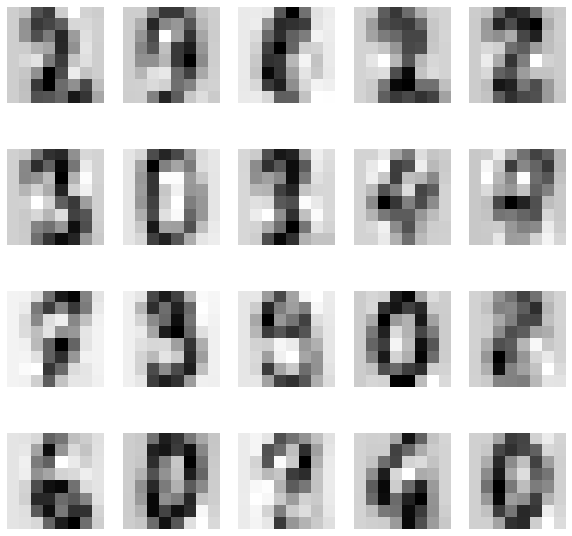

In [8]:
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]

for i, ax in enumerate(fig.axes):
    ax.imshow(samples[i], cmap=plt.cm.binary)

### Part D.

In [9]:
params = {"bandwidth": np.arange(1.05, 6, 0.05)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(dataset)
bandwidth = grid.best_estimator_.bandwidth
print("bandwidth: {:.2f}".format(bandwidth))

bandwidth: 1.75


In [10]:
kde = KernelDensity(bandwidth=bandwidth)
kde.fit(pca_dataset)

samples = kde.sample(n_samples=20, random_state=0)
samples = pca.inverse_transform(samples)

samples = samples.reshape(20, 8, 8)
samples.shape

(20, 8, 8)

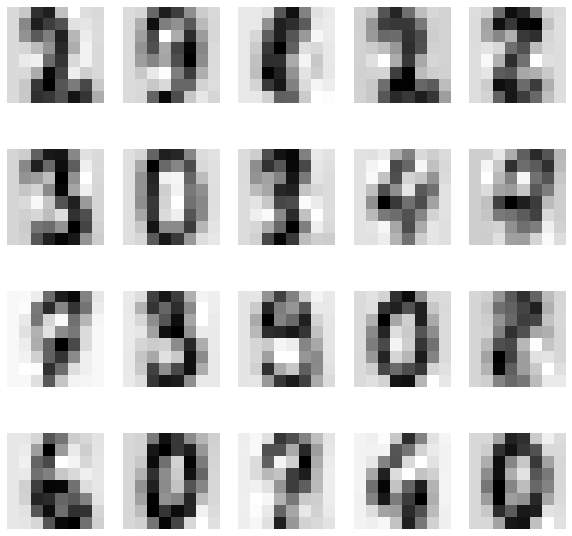

In [11]:
fig, ax = plt.subplots(4, 5, figsize=(10, 10))
[axi.set_axis_off() for axi in ax.ravel()]

for i, ax in enumerate(fig.axes):
    ax.imshow(samples[i], cmap=plt.cm.binary)

#### FINITO